LOADING DATASET

In [15]:
library(tidyverse)
library(dplyr)

df <- read.csv('tps00205_linear.csv')

df <- df %>%
  select(sex, geo, TIME_PERIOD, OBS_VALUE)

DRAWING GRAPH 1 --> Average Life Expectancy by Country (Total)

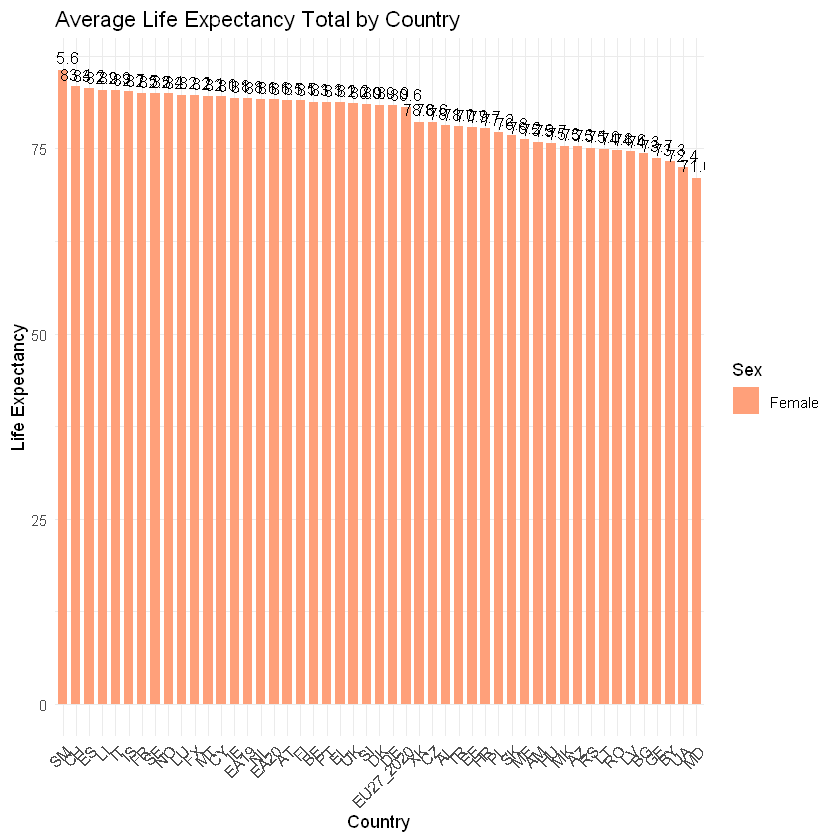

In [35]:
df2 <- df %>%
  filter(sex == "T")

df_means <- df2 %>%
  group_by(geo, sex) %>%
  summarise(mean_value = mean(OBS_VALUE)) %>%
  ungroup()

df_means <- df_means %>%
  mutate(geo = reorder(geo, -mean_value))

ggplot(df_means, aes(x = geo, y = mean_value, fill = sex)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(title = "Average Life Expectancy Total by Country",
       x = "Country",
       y = "Life Expectancy") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(aes(label = sprintf("%.1f", mean_value)), 
            position = position_dodge(width = 0.7), 
            vjust = -0.5, 
            size = 3.5) +
  scale_fill_manual(values = c("#FFA07A", "#9370DB"), 
                    name = "Sex",
                    labels = c("Female", "Male")) +
  guides(fill = guide_legend(title = "Sex"))

# ggsave("barplot1.png", plot = p, width = 20, height = 6, units = "in")

DRAWING GRAPH 2 --> Average Life Expectancy by Country (Male vs Female)

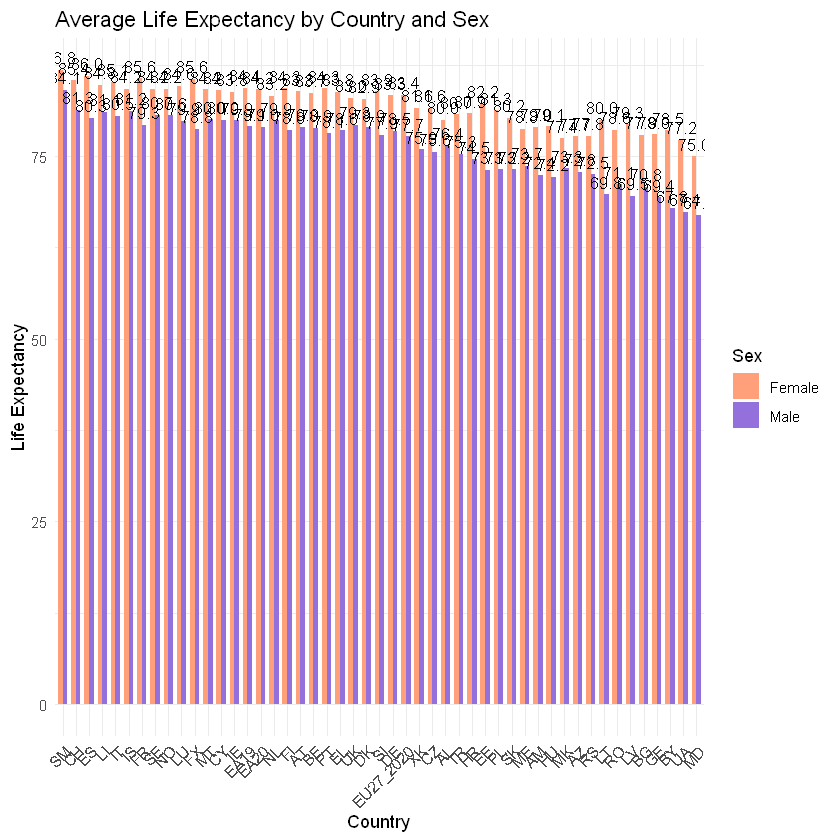

In [34]:
df2 <- df %>%
  filter(sex != "T")

df_means <- df2 %>%
  group_by(geo, sex) %>%
  summarise(mean_value = mean(OBS_VALUE)) %>%
  ungroup()

df_means <- df_means %>%
  mutate(geo = reorder(geo, -mean_value))

ggplot(df_means, aes(x = geo, y = mean_value, fill = sex)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(title = "Average Life Expectancy by Country and Sex",
       x = "Country",
       y = "Life Expectancy") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(aes(label = sprintf("%.1f", mean_value)), 
            position = position_dodge(width = 0.7), 
            vjust = -0.5, 
            size = 3.5) +
  scale_fill_manual(values = c("#FFA07A", "#9370DB"), 
                    name = "Sex",
                    labels = c("Female", "Male")) +
  guides(fill = guide_legend(title = "Sex"))

# ggsave("barplot2.png", plot = p, width = 20, height = 6, units = "in")

DRAWING GRAPH 3 --> Life Expectancy Over Time by Sex

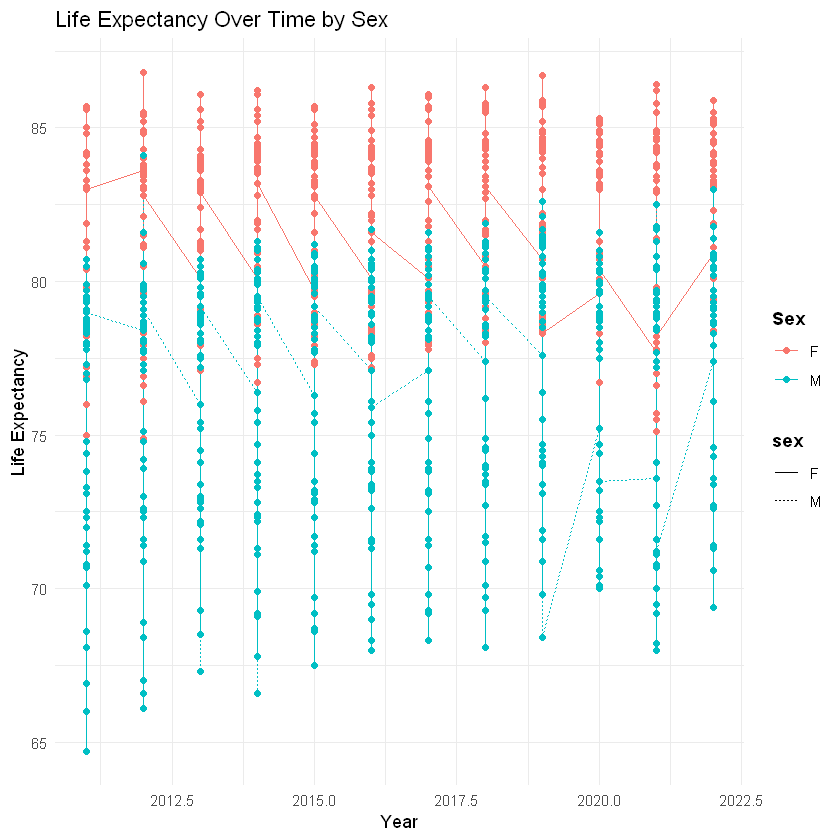

In [36]:
df_filtered <- subset(df, sex != "T")

ggplot(df_filtered, aes(x = TIME_PERIOD, y = OBS_VALUE, color = sex, linetype = sex)) +
  geom_line() +
  geom_point() +
  labs(title = "Life Expectancy Over Time by Sex",
       x = "Year",
       y = "Life Expectancy",
       color = "Sex") +
  theme_minimal() +
  theme(legend.title = element_text(face = "bold"))

ggsave("barplot3.png", plot = p, width = 10, height = 6, units = "in")